In [1]:
import numpy as np 
import torch
import random
import tqdm
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from IPython import embed

In [2]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

In [3]:
X=torch.from_numpy(X)
y=torch.from_numpy(y)
torch_con=torch.FloatTensor([1 for _ in X[0]])

In [4]:
torch_con=torch.FloatTensor([[1.0] for _ in X[:,-1]]).type('torch.DoubleTensor')

n_samples = len(y)

mu = torch.mean(X,0)
sigma = torch.std(X,0)
X = (X-mu) / sigma


X=torch.cat((torch_con,X),dim=-1)
n_features=X.shape[1]


In [8]:
#X = np.hstack((np.ones((n_samples,1)),X))
#n_features = np.size(X,1)
params = torch.zeros((n_features,1)).type('torch.DoubleTensor')


In [9]:
def cost_function(X, y, params) -> float:
    n_samples = len(y)
    y_p = X @ params
    return (1/(n_samples))*sum((y_p-y)**2)

def gradient_descent(X, y, params, learning_rate, n_iters):
    guess = torch.zeros((n_features,1)).type('torch.DoubleTensor')
    cost_history=torch.zeros((n_iters,1))
    
    for _ in tqdm.trange(n_iters,desc='gradient descent'):
        gradient = -1/len(X) * 2*X.t() @ (X @ guess - y)
        gradient_step=gradient*learning_rate
        guess=torch.add(guess,gradient_step)
        cost=cost_function(X,y,guess)
        cost_history[_]=cost
    return (cost_history, guess)



gradient descent:   2%|▏         | 30/1500 [00:00<00:05, 292.39it/s]

Initial cost is:  tensor([592.1469], dtype=torch.float64) 



gradient descent: 100%|██████████| 1500/1500 [00:04<00:00, 308.47it/s]


Optimal parameters are: 
 tensor([[ 2.2533e+01],
        [-9.0369e-01],
        [ 1.0387e+00],
        [ 1.4295e-02],
        [ 7.0040e-01],
        [-2.0222e+00],
        [ 2.7032e+00],
        [-2.1925e-03],
        [-3.1050e+00],
        [ 2.3430e+00],
        [-1.7190e+00],
        [-2.0480e+00],
        [ 8.4871e-01],
        [-3.7344e+00]], dtype=torch.float64) 

Final cost is:  tensor([21.9110])


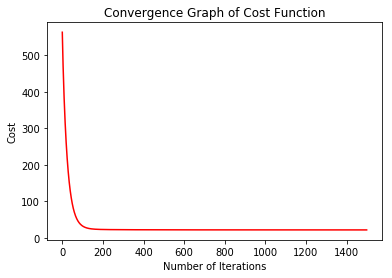

In [10]:
n_iters = 1500
learning_rate = 0.01

initial_cost = cost_function(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history.numpy(), 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()